In [279]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [271]:
def remove_Outliers(churn_dataset_filtered_train):
    nrows = churn_dataset_filtered_train.shape[0]
    indexes_to_be_dropped = []
    for i in range(0,nrows):
        count = 0
        for col in churn_dataset_filtered_train.columns:
            if churn_dataset_filtered_train[col].iloc[[i]].values[0] >np.mean(churn_dataset_filtered_train[col])+2*np.std(churn_dataset_filtered_train[col]):
                count = count+1
            if count >10:
                indexes_to_be_dropped.append(i)
                break
    return indexes_to_be_dropped

In [4]:
#This function checks the validity of float,it is specifically used for the various float columns to check if the strings are
#valid floating point strings
def isFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        if re.match("^\d+",s) is None:
            return False
        else:
            return True
    return True

In [160]:
def isStrictlyFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        return False
    else:
        return True

In [6]:
#This function visualizes boxplots
def BoxPlot(churn_dataset_filtered_train,attributes):
    for attribute in attributes:
        cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
        churned_std_og_t2t = cf[cf['churn'] ==1]
        nonchurned_std_og_t2t = cf[cf['churn'] ==0]
        plt.boxplot(churned_std_og_t2t[attribute])
        plt.show()
        print(np.median(churned_std_og_t2t[attribute]))
        print(np.mean(churned_std_og_t2t[attribute]))
        plt.boxplot(nonchurned_std_og_t2t[attribute])
        plt.show()
        print(np.median(nonchurned_std_og_t2t[attribute]))
        print(np.mean(nonchurned_std_og_t2t[attribute]))

In [7]:
#This function imputes with the median
def ImputeMedian(churn_dataset_filtered_train,attributes):
    for attribute in attributes:
        cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
        notna_notchurn_loc_og_t2m_mou = cf[(cf['churn']==0)]
        notna_churn_loc_og_t2m_mou = cf[(cf['churn']==1)]
        churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_churn_loc_og_t2m_mou[attribute])
        churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_notchurn_loc_og_t2m_mou[attribute])
        cf2 = churn_dataset_filtered_train[attribute]
        #churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train[attribute]<np.percentile(list(cf2),98.5)]
    return churn_dataset_filtered_train

In [8]:
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

In [9]:
telecom_churn_data.shape

(99999, 226)

In [10]:
len(telecom_churn_data['mobile_number'].unique())

99999

The data set has 99999 rows and the number of unique mobile number is too 99999 hence each row corresponds to a unique mobile number

The next step to do would be identify the data of interest,the high value customers ,so for that lets look at total_rech_amt_6 and total_rech_amt_7

In [11]:
print(sum(telecom_churn_data['total_rech_amt_6'].isna()))
print(sum(telecom_churn_data['total_rech_amt_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_6'].isna()))

0
0
0
0


In [12]:
filter_amt_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_6']))
filter_amt_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_7']))
filter_rech_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_6']))
filter_rech_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_7']))

In [13]:
#len(filter_amt_6.to_list())
print(len(filter_amt_6))
print(len(filter_amt_7))
print(len(filter_rech_6))
print(len(filter_rech_7))

99999
99999
99999
99999


None of the columns pertaining to recharge amounts of first 2 months and none of the columns pertaining to number of times recharged have values other than floating point and all of them have 99999 values in total with no nan values.Hence data quality is verified 

In [14]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = 0

In [15]:
zeros_data = telecom_churn_data[(telecom_churn_data['total_rech_num_6'] ==0)]
zeros_data.shape

(1607, 227)

In [16]:
print(sum(zeros_data['total_rech_amt_6']>0))


0


In [17]:
zeros_data = telecom_churn_data[(telecom_churn_data['total_rech_num_7'] ==0)]
print(sum(zeros_data['total_rech_amt_7']>0))

0


The above code was to check that if the total recharge done is zero for months 6 and 7 then
the number of times  recharge done should too be zero.Its perfect that way

In [18]:
telecom_churn_data.loc[(((telecom_churn_data['count_rech_2g_6']==0)|(telecom_churn_data['count_rech_2g_6'].isna()))&(telecom_churn_data['date_of_last_rech_data_6'].isna())&((telecom_churn_data['count_rech_3g_6']==0)|(telecom_churn_data['count_rech_3g_6'].isna()))&((telecom_churn_data['av_rech_amt_data_6']==0)|(telecom_churn_data['av_rech_amt_data_6'].isna()))),['av_rech_amt_data_6','count_rech_3g_6','count_rech_2g_6']] = 0

In [19]:
print(sum(telecom_churn_data['av_rech_amt_data_6'].isna()))
print(sum(telecom_churn_data['count_rech_2g_6'].isna()))
print(sum(telecom_churn_data['count_rech_3g_6'].isna()))

0
0
0


In [20]:
telecom_churn_data.loc[(((telecom_churn_data['count_rech_2g_7']==0)|(telecom_churn_data['count_rech_2g_7'].isna()))&(telecom_churn_data['date_of_last_rech_data_7'].isna())&((telecom_churn_data['count_rech_3g_7']==0)|(telecom_churn_data['count_rech_3g_7'].isna()))&((telecom_churn_data['av_rech_amt_data_7']==0)|(telecom_churn_data['av_rech_amt_data_7'].isna()))),['av_rech_amt_data_7','count_rech_3g_7','count_rech_2g_7']] = 0

In [21]:
print(sum(telecom_churn_data['av_rech_amt_data_7'].isna()))
print(sum(telecom_churn_data['count_rech_2g_7'].isna()))
print(sum(telecom_churn_data['count_rech_3g_7'].isna()))

0
0
0


In [22]:
telecom_churn_data.loc[(((telecom_churn_data['count_rech_2g_8']==0)|(telecom_churn_data['count_rech_2g_8'].isna()))&(telecom_churn_data['date_of_last_rech_data_8'].isna())&((telecom_churn_data['count_rech_3g_8']==0)|(telecom_churn_data['count_rech_3g_8'].isna()))&((telecom_churn_data['av_rech_amt_data_8']==0)|(telecom_churn_data['av_rech_amt_data_8'].isna()))),['av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8']] = 0

In [23]:
print(sum(telecom_churn_data['av_rech_amt_data_8'].isna()))
print(sum(telecom_churn_data['count_rech_2g_8'].isna()))
print(sum(telecom_churn_data['count_rech_3g_8'].isna()))

0
0
0


In [24]:
telecom_churn_data['total_data_rech_month_6'] = (telecom_churn_data['count_rech_2g_6']+telecom_churn_data['count_rech_3g_6'])*telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data['total_data_rech_month_7'] = (telecom_churn_data['count_rech_2g_7']+telecom_churn_data['count_rech_3g_7'])*telecom_churn_data['av_rech_amt_data_7']

In [25]:
print(sum(telecom_churn_data['total_data_rech_month_6'].isna()))
print(sum(telecom_churn_data['total_data_rech_month_7'].isna()))

0
0


In [26]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = (telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7']+telecom_churn_data['total_data_rech_month_6']+telecom_churn_data['total_data_rech_month_7'])/(2)
#telecom_churn_data.loc[telecom_churn_data['avg_recharge_amt'].isna(),['avg_recharge_amt'] ] =0

In [27]:
sum(telecom_churn_data['avg_recharge_amt'].isna())

0

In [28]:
telecom_churn_data['avg_recharge_amt'].head()
telecom_churn_data['avg_recharge_amt'].shape

(99999,)

In [29]:
np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)

478.0

In [30]:
high_value_customers = telecom_churn_data[telecom_churn_data['avg_recharge_amt']>np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)]

In [31]:
high_value_customers.shape

(29953, 229)

In [32]:
high_value_customers['churn'] = 0

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
high_value_customers.loc[((high_value_customers['total_ic_mou_9']==0)&(high_value_customers['total_og_mou_9']==0)&(high_value_customers['vol_2g_mb_9']==0)&(high_value_customers['vol_3g_mb_9']==0)),['churn']] = 1

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
sum(high_value_customers['churn'])

2433

In [35]:
high_value_customers.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'avg_recharge_amt', 'total_data_rech_month_6',
       'total_data_rech_month_7', 'churn'],
      dtype='object', length=230)

Drop off all the columns ending with _9 after identifying churners.

In [36]:
cols = list(filter( lambda x: ("_9" not in x) ,high_value_customers.columns))

In [37]:
churn_dataset = high_value_customers[cols]

In [38]:
churn_dataset.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7  ...  fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0    214.816  ...        1.0  968       30.40        0.00      101.20   
7   1349.850  ...        NaN  802       57.74       19.38       18.74   
8    492.223  ...        1.0  315       21.03      910.65      122.16   
21   597.753  ...        NaN  720        0.00        0.00        0.00   
23   193.897  ...        1.0  604       40.45       51.86        0.00   

    sep_vbc_3g  avg_recharge_amt  total_data_rech_month_6  \
0         3.58             559.0                    252.0   
7         0.00            1185.0                      0.0   
8         0.00             696.0                      0.0   
21        0.00             640.0                      0.0   
23        0.00             583.0                      0.0   

    total_data_rech_month_7  churn  
0                     252.0      1  
7                       0.0      1  
8                     354.0      0  
21                      0.0      0  
23                    712.0      0  

[5 rows x 176 columns]

In [39]:
churn_dataset.to_csv('churndataset.csv')

In [40]:
print(churn_dataset['circle_id'].unique())
print(sum(churn_dataset['circle_id'].isna()))

[109]
0


We can eliminate certain columns like date of last recharge,last recharge of data ,last date ,mobile number.As seve on use on business value,afterall the amount of recharge matters.

In [41]:
churn_dataset = churn_dataset.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_6'],axis = 1)

In [42]:
churn_dataset = churn_dataset.drop(['mobile_number'],axis = 1)

In [43]:
len(churn_dataset.columns)

170

In [44]:
backup_data_frame = churn_dataset

In [45]:
churn_dataset = backup_data_frame

First lets consider attributes which could possibly be useful in determining churn.


In [46]:
#The columns with arpu can be dropped as the revenue could be in way determined by recharge amount,so lets drop the columns with arpu
newcols = list(filter(lambda x:('arpu' not in x), list(churn_dataset.columns)))
churn_dataset_filtered = churn_dataset[newcols]

In [47]:
churn_dataset_filtered = churn_dataset[newcols]

In [48]:
#print(newcols)
len(churn_dataset_filtered.columns)

161

In [49]:
#Lets consider the categories of attributes one by one.
#Firstly lets consider local calls
#1.local calls outgoing to other operator fixed line
sum(churn_dataset_filtered['loc_og_t2o_mou'].isna())

223

In [50]:
cf = churn_dataset_filtered[~churn_dataset_filtered['loc_og_t2o_mou'].isna()]
cf['loc_og_t2o_mou'].mean()

0.0

In [51]:
#Since all the values are zero in it,it does not serve any meaningful info for regression,so drop it.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_1 = churn_dataset_filtered.drop(['loc_og_t2o_mou'],axis = 1)

In [52]:
cf = churn_dataset_filtered_1[~churn_dataset_filtered_1['std_og_t2o_mou'].isna()]
cf['std_og_t2o_mou'].mean()

0.0

In [53]:
#Since all the non null values are zero again it does not serve any meaningful infromation for regression.It can be dropped.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_2 = churn_dataset_filtered_1.drop(['std_og_t2o_mou'],axis = 1)

In [54]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_2[~churn_dataset_filtered_2['loc_ic_t2o_mou'].isna()]
cf['loc_ic_t2o_mou'].mean()

0.0

In [55]:
churn_dataset_filtered_3 = churn_dataset_filtered_2.drop(['loc_ic_t2o_mou'],axis = 1)

So far we have just dropped certain columns,now it is ideal to split the data into train and test,before imputing the values or checking the distributions as test data should ideally be unseen. 

In [56]:
churn_dataset_filtered_train,churn_dataset_filtered_test=train_test_split(churn_dataset_filtered_3,train_size=0.7,test_size=0.3,random_state=100)

In [57]:
print(churn_dataset_filtered_train.shape)
print(churn_dataset_filtered_test.shape)

(20967, 158)
(8986, 158)


In [58]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
print(cf.shape)
#cf['loc_ic_t2o_mou'].mean()

(385, 158)


In [59]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
cf['loc_og_t2t_mou_6'].mean()

85.06559615197617

{'whiskers': [<matplotlib.lines.Line2D at 0x2d19b878c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2d19b87fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d19c7df88>],
 'medians': [<matplotlib.lines.Line2D at 0x2d19b90ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d19b95ec8>],
 'means': []}

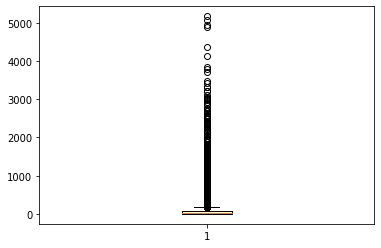

In [60]:
plt.boxplot(cf['loc_og_t2t_mou_6'])

In [61]:
#There is of course skewness in the data.However lets check the distribution of churn and not churn in this dataset.
#cf.groupby('churn')['onnet_mou_6'].count()
print(cf.shape)
sum(cf['churn'])
#1523 have churned

(20582, 158)


1644

14.745000000000001

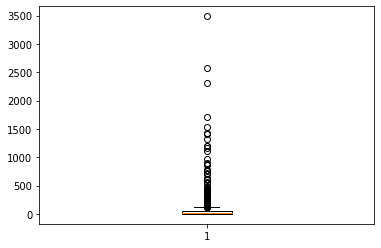

In [62]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==1]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

26.68

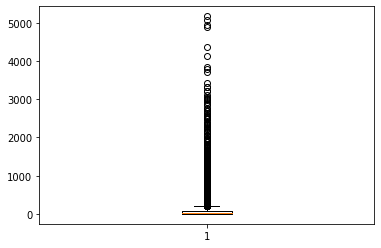

In [63]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==0]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

In [64]:
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
#print(cf2.groupby('churn')['onnet_mou_6'].count())
print(cf2.shape)
sum(cf2['churn'])
#Here 320 have churned which is considerable quite large when the dataset is imbalanced ,we must consider
#imputing these values.

(385, 158)


108

In [65]:
#impute the values of na's with their respective medians of groups of churned and unchurned
#churn_dataset_filtered_train
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,['loc_og_t2t_mou_6'])

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
cf['loc_og_t2t_mou_7'].mean()

86.42336797629874

10.94

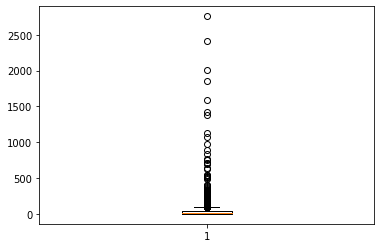

In [67]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

27.01

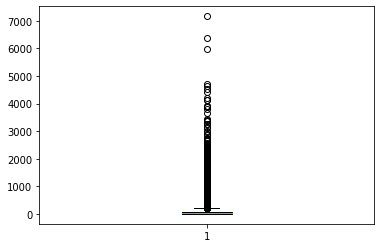

In [68]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

In [69]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(376, 158)
(151, 158)
(225, 158)


In [70]:
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =8.23
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =29.96
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,['loc_og_t2t_mou_7'])


C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2t_mou_7']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

757.3674999999996
0.0


In [72]:
#churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7']<np.percentile(list(cf),98.5)]
#churn_dataset_filtered_train.shape

In [73]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna()]
cf['loc_og_t2t_mou_8'].mean()

80.31443091451202

1.0

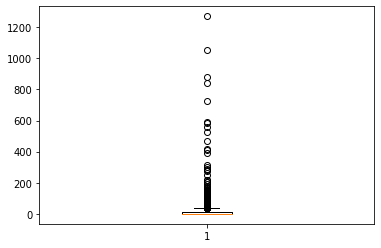

In [74]:
notna_churn_loc_og_t2t_mou_8 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])
np.median(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])

25.21

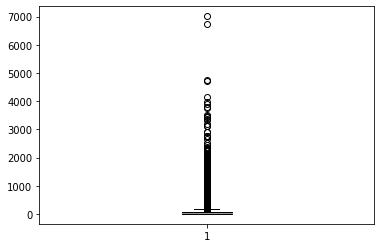

In [75]:
notna_churn_loc_og_t2t_mou_8 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])
np.median(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])

In [76]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(847, 158)
(583, 158)
(264, 158)


In [77]:
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna())),['loc_og_t2t_mou_8']] =0.02
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna())),['loc_og_t2t_mou_8']] =28.76
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,['loc_og_t2t_mou_8'])

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2t_mou_8']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

664.8119999999997
0.0


In [79]:
#churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_8']<np.percentile(list(cf),98.5)]
#churn_dataset_filtered_train.shape

In [80]:
#Now lets take the next attribute log_og_t2m_mou_6 and check non na values of it
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna()]
cf['loc_og_t2m_mou_6'].mean()

165.0141740355617

44.59

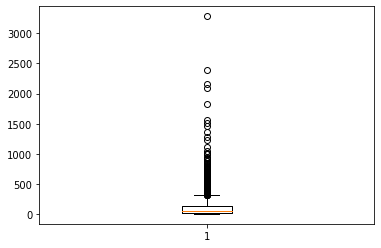

In [81]:
notna_churn_loc_og_t2m_mou_6 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])
np.median(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])

83.14

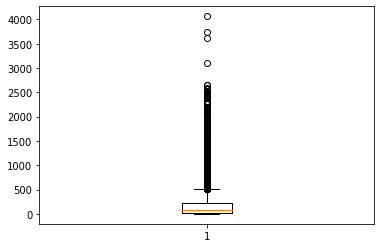

In [82]:
notna_churn_loc_og_t2m_mou_6 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])
np.median(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])

In [83]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(385, 158)
(108, 158)
(277, 158)


Here we see that they are almost equal the number of churns and non churns in case of nas.We can impute them respectively with
the median of their classes as the values for loc_og_t2m_mou_6 are highly skewed

In [84]:
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna())),['loc_og_t2m_mou_6']] =44.98
#churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna())),['loc_og_t2m_mou_6']] =91.33
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,['loc_og_t2m_mou_6'])

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2m_mou_6']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

989.1502
0.0


In [86]:
#churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2m_mou_6']<np.percentile(list(cf),98.5)]
#churn_dataset_filtered_train.shape

In [87]:
#Since there are many attributes we can repeat the process iteratively for all of them in a loop
attributes = ['loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']
for attribute in attributes:
    cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
    notna_notchurn_loc_og_t2m_mou = cf[(cf['churn']==0)]
    notna_churn_loc_og_t2m_mou = cf[(cf['churn']==1)]
    churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_churn_loc_og_t2m_mou[attribute])
    churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_notchurn_loc_og_t2m_mou[attribute])
    cf2 = churn_dataset_filtered_train[attribute]
    #churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train[attribute]<np.percentile(list(cf2),98.5)]

0.0
0.0


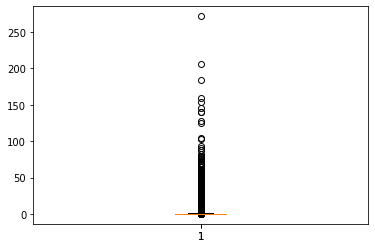

In [88]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2c_mou_6'].isna()]
notna_notchurn_loc_og_t2c_mou = cf[(cf['churn']==0)]
notna_churn_loc_og_t2c_mou = cf[(cf['churn']==1)]
plt.boxplot(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6'])
print(np.median(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6']))
plt.boxplot(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6'])
print(np.median(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6']))

In [89]:
print(np.mean(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6']))
print(np.mean(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6']))

1.6047227795965806
1.7331690997566929


As we see both mean and median is more or less similar close to zero and 1 ,this column can be dropped off,however the number
of times the person makes calls to call center can be determining factor for churn as if the people are not happy with service
they frequently call the call center,we can let the model decide on this.


In [90]:
attributes = ['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']

In [91]:
#We observe that the distribution is more or less similar for other month calls to call center,hence they can be imputed similarly
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
#Further we can drop the attributes corresponding to total calls,as they are just the sum of columns corresponding to ouutgoing calls
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis = 1)
#churn_dataset_filtered_train['log_og_mou_6'].head()
churn_dataset_filtered_train.shape

(20967, 155)

Now we can have a look at std outgoing calls

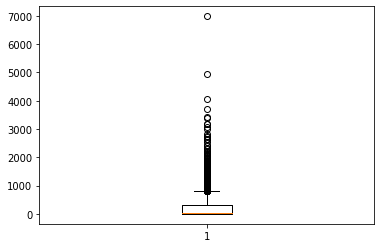

27.75


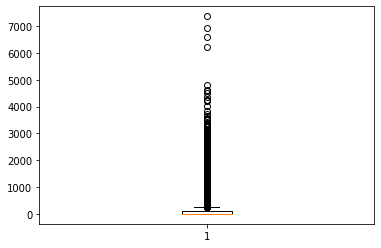

2.58


In [93]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2t_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2t_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2t_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2t_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2t_mou_6']))

This is interesting contrary to local calls the churned users have higher std usage for outgoing calls of this category.
Lets check for std calls of other categories too

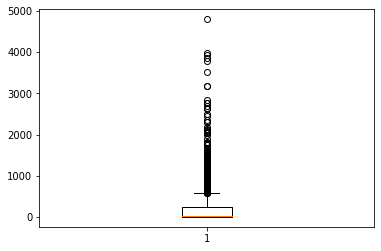

13.68


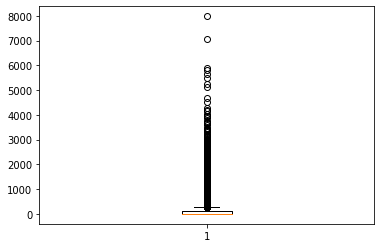

2.7


In [94]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2t_mou_7'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2t_mou_7'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2t_mou_7']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2t_mou_7'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2t_mou_7']))

Again the same is true for month 7 too.We will now impute the missing the missing values with median for all 3 categories of months 6,7,8.

In [95]:
attributes = ['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

We missed out the analysis of local mobile to fixed line.

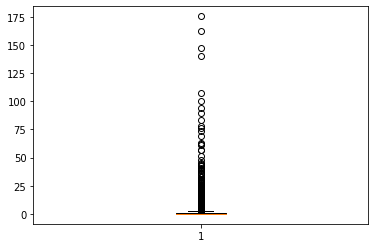

0.0


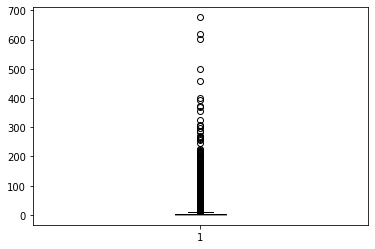

0.28


In [96]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_6']))

In [97]:
print(np.mean(churned_std_og_t2t['loc_og_t2f_mou_6']))
print(np.mean(nonchurned_std_og_t2t['loc_og_t2f_mou_6']))

3.1918036529680403
6.68691230809255


There does not seem to be much difference in the means and medians of churns and non churns in case of local outgoing calls to same operator

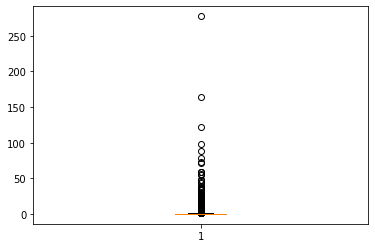

0.0


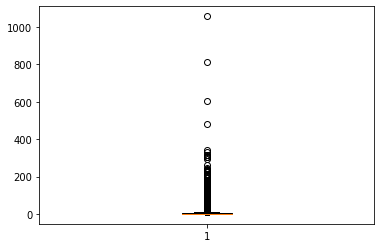

0.36


In [98]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_7'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_7'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_7']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_7'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_7']))

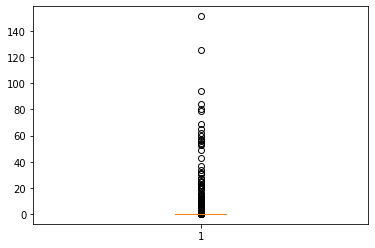

0.0


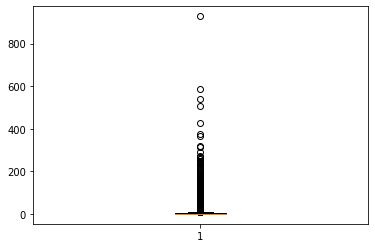

0.25


In [99]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_8'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_8'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_8']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_8'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_8']))

We can drop the columns corresponding to fixed lines of same ooperator as there is indeed not
much difference in estimates of outgoing calls to fixed lines within same operator

In [100]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['loc_og_t2f_mou_8','loc_og_t2f_mou_7','loc_og_t2f_mou_6'],axis = 1)

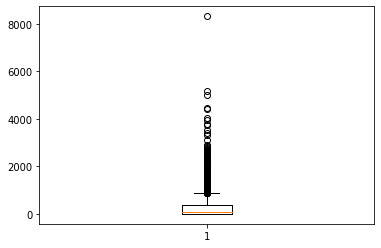

65.11


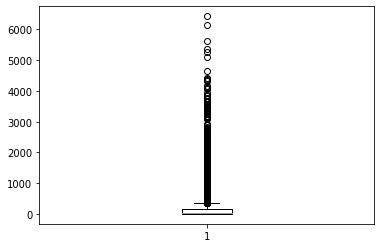

15.75


In [101]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2m_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2m_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2m_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2m_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2m_mou_6']))

Here we see indeed there is difference in median values of outgoing std calls to other operators
between those who have churned and those not churned

In [102]:
#We can impute missing values with the median for all outgoing std to other lines
cf = churn_dataset_filtered_train[churn_dataset_filtered_train['std_og_t2m_mou_6'].isna()]
#cf.shape
attributes = ['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

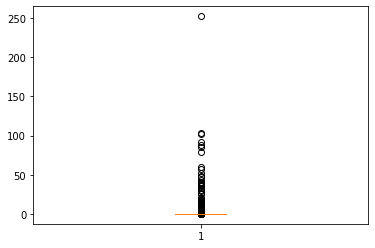

0.0


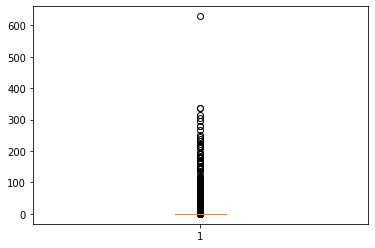

0.0


In [103]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2f_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2f_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2f_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2f_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2f_mou_6']))

In [104]:
print(np.mean(nonchurned_std_og_t2t['std_og_t2f_mou_6']))
print(np.median(nonchurned_std_og_t2t['std_og_t2f_mou_6']))

1.9684348928081181
0.0


Although the distribution of churn and not churn seems to be more or less similar there is slight difference in their mean.
We can consider this for our model and let model decide if the variable is significant

In [105]:
#We can do this for all months of std_t2f 6,7,8
attributes = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

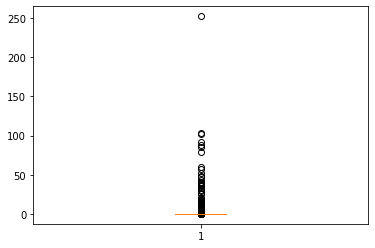

0.0
1.2862899543379003


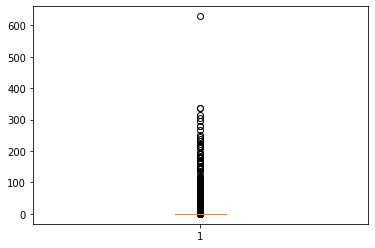

0.0
1.940058287796


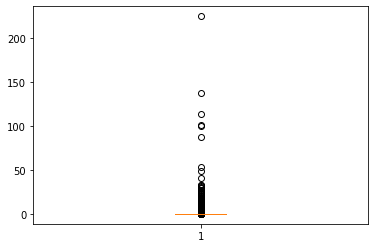

0.0
1.1205593607305953


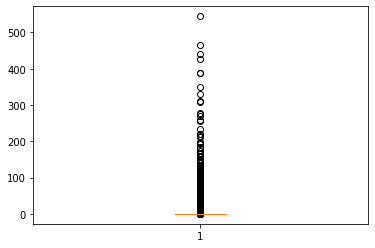

0.0
1.983699193338545


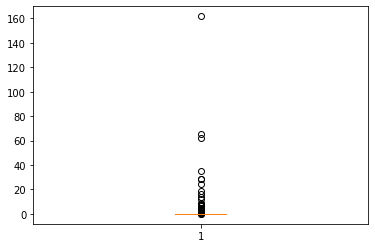

0.0
0.33805365296803647


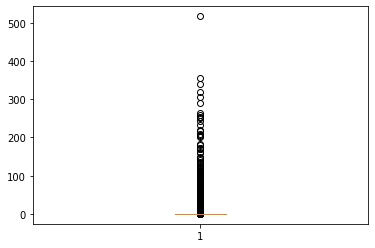

0.0
1.7666146239916767


In [106]:
attributes = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)
#churn_dataset_filtered_train.columns

In [107]:
np.percentile(churn_dataset_filtered_train['std_og_t2f_mou_8'],87)


0.35

We drop these columns as there is indeed some difference in the means atleast though most of the entries are 0 as we see uptill
87 percentile the values are zeros

In [108]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'],axis = 1)

Now lets look at the calls of std to call centers

In [109]:
attributes = ['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8']
print(sum(churn_dataset_filtered_train['std_og_t2c_mou_6']>0))
print(sum(churn_dataset_filtered_train['std_og_t2c_mou_7']>0))
print(sum(churn_dataset_filtered_train['std_og_t2c_mou_8']>0))

0
0
0


In [110]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(attributes,axis = 1)

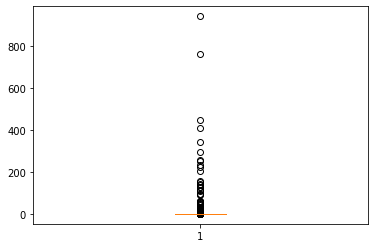

0.0
4.259519464720196


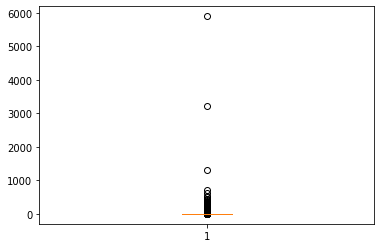

0.0
2.080045411342277


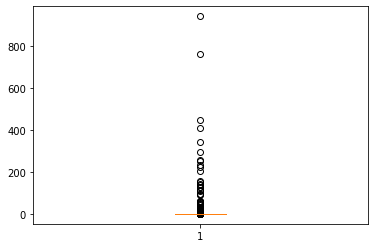

0.0
4.259519464720196


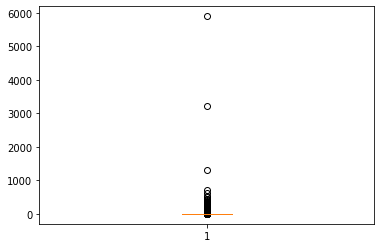

0.0
2.080045411342277


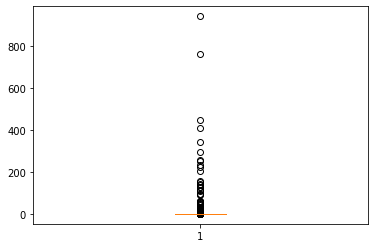

0.0
4.259519464720196


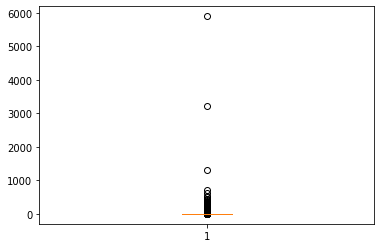

0.0
2.080045411342277


In [111]:
attributes = ['isd_og_mou_6','isd_og_mou_6','isd_og_mou_6']
BoxPlot(churn_dataset_filtered_train,attributes)

Although the median is 0 for all 3 months in case isd outgoing calls,however is is some difference in the means.
We can impute the data with median as it is quite skewed,isd calls are slightly higher in duration in case of churn


In [112]:
attributes = ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

In [113]:
churn_dataset_filtered_train.shape

(20967, 146)

Now lets check the special calls distributions

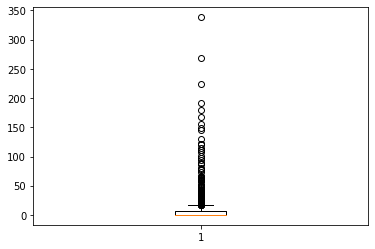

0.63
7.62014598540145


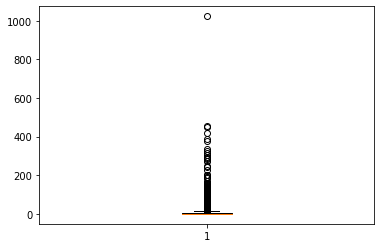

0.26
5.811069278698855


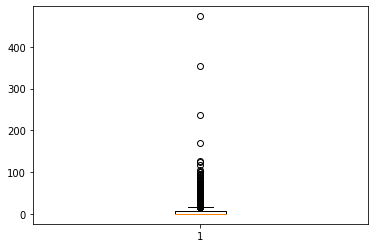

0.78
7.846908182386004


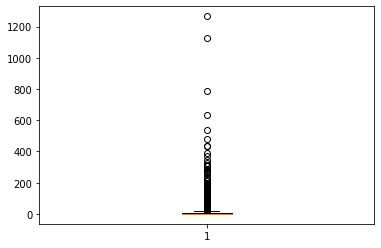

0.785
7.166062664560209


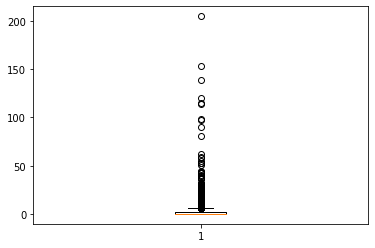

0.0
4.260153977758771


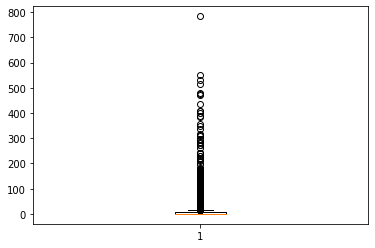

0.73
6.9644599229591515


In [114]:
attributes = ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [115]:
#We see that the median is close to zero but there are differences in mean,not sure if its statistically significant we cant
#let the model decide this.However lets impute the vallues with the median.
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)


We can drop the column og_others as it does not seem to add value in terms of business and it has most of the values as 0 upto 88 percentile

In [116]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['og_others_6'].isna()]
np.percentile(cf['og_others_6'],88)

1.68

In [117]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['og_others_6','og_others_7','og_others_8'],axis = 1)

We can also get rid of the variables corressponding to total minutes of outgoing calls ,as they are already redundant since we have the minutes for individual months

In [118]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['total_og_mou_6','total_og_mou_7','total_og_mou_8'],axis = 1)

Now lets check the columns corressponding to incoming calls of various types.

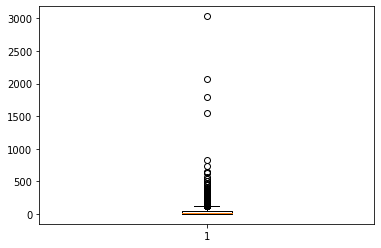

14.915
47.36339416058398


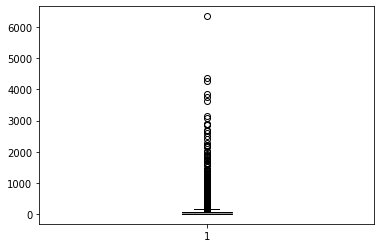

26.66
66.69264917097905


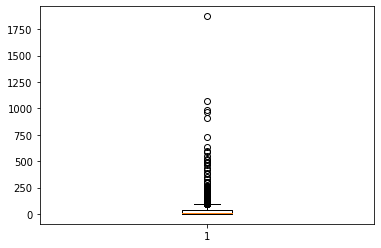

12.06
38.69619612742034


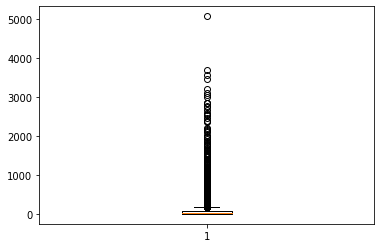

27.88
69.09938335966277


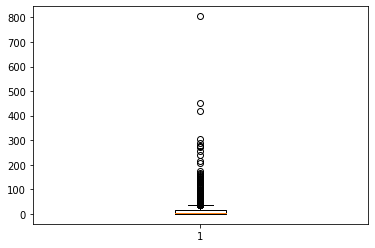

1.84
17.163267750213855


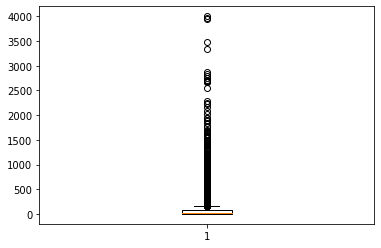

26.74
66.59103266318364


In [119]:
attributes = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [120]:
# We see there is a significant difference in the distributions of incoming calls within same operators
#More ever the data is highly skewed,hence we can impute the missing values with medians.
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

Now lets check the distribution of other incoming calls from operators

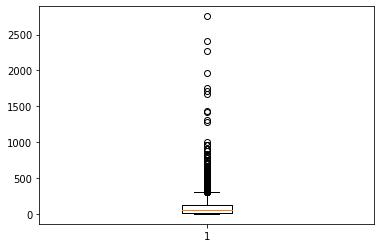

52.35
115.8866909975668


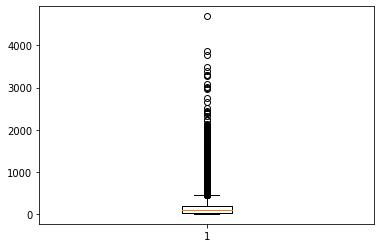

89.68
156.8205180061222


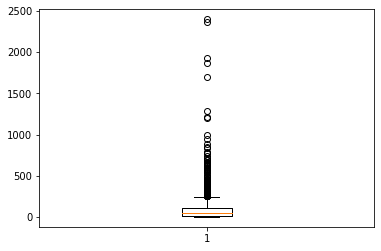

41.91
92.7141286695812


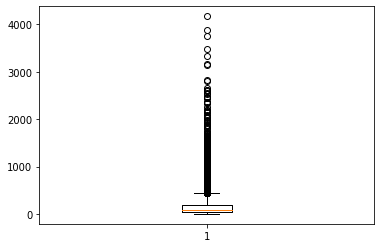

92.35
159.04197472353482


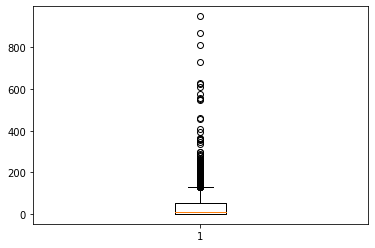

8.56
43.718374679213056


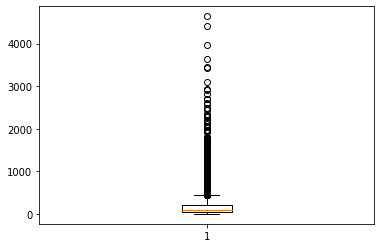

91.29
159.32479394226854


In [121]:
attributes = ['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [122]:
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

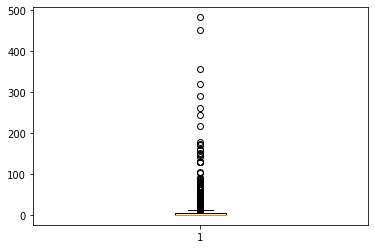

0.21
8.436836982968359


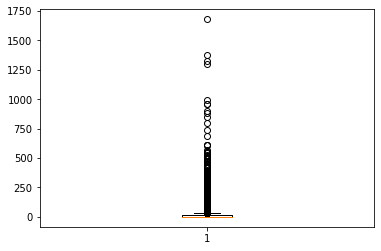

2.23
16.252404688985155


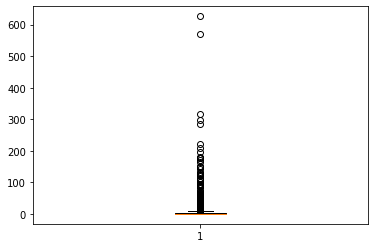

0.0
8.036189881324162


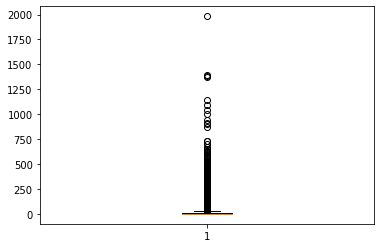

2.5199999999999996
17.23947551342811


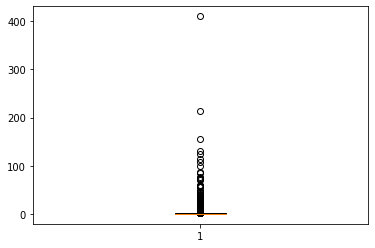

0.0
4.051026518391789


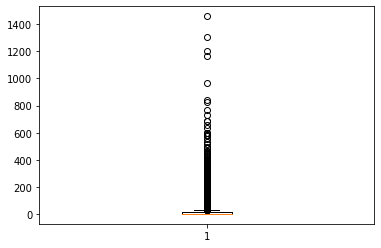

2.43
15.806816526832332


In [123]:
attributes = ['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [124]:
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

In [125]:
#These attributes are redundant,they can be dropped as already the individual category values are present
attributes = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(attributes,axis = 1)

In [126]:
churn_dataset_filtered_train.shape

(20967, 137)

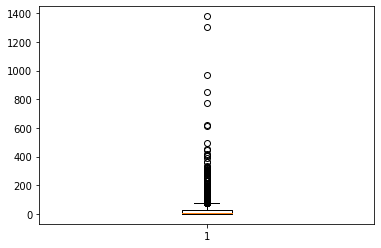

7.595000000000001
32.59945255474458


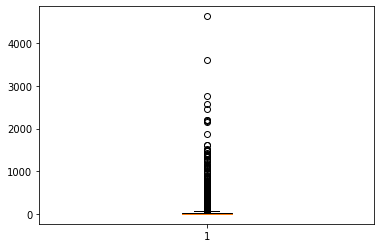

5.11
29.218823529412113


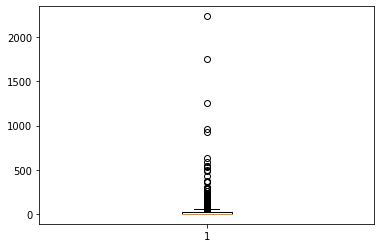

4.53
28.13328544659591


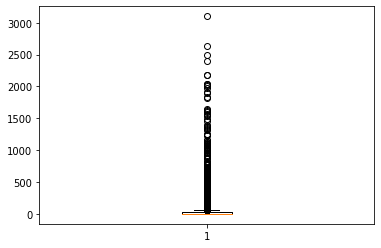

5.66
31.550118483412948


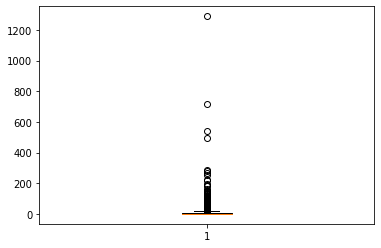

0.0
13.156920444824625


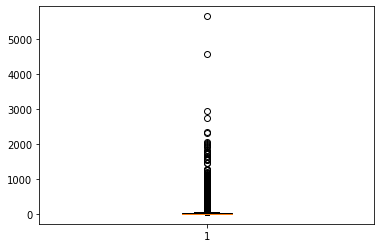

4.84
30.066094665189585


In [127]:
attributes = ['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [128]:
#Again these columns can be included imputed with their median as data is skewed.
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

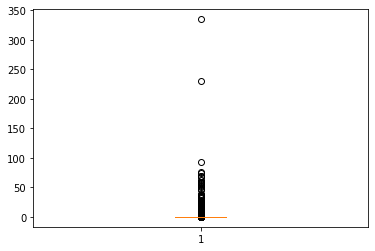

0.0
1.8648965936739679


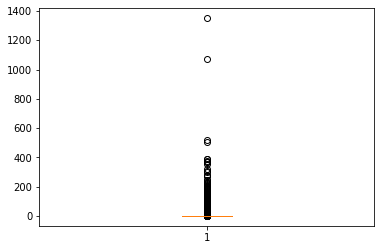

0.0
2.827997676629028


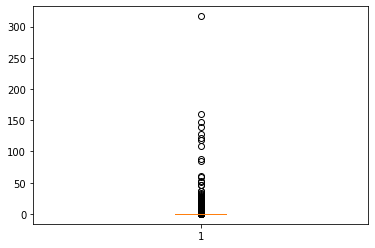

0.0
1.9043910056214877


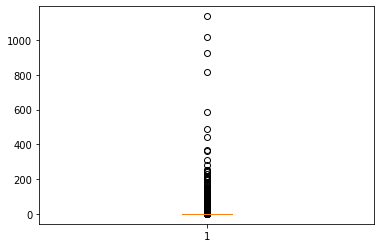

0.0
2.9399262769879164


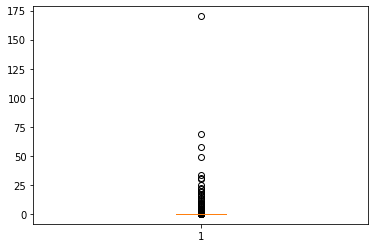

0.0
0.6971770744225831


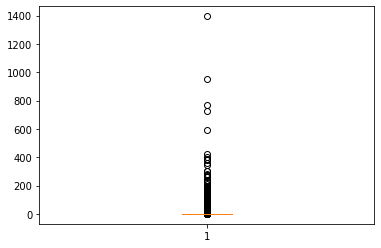

0.0
2.8167442351327368


In [129]:
attributes = ['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

Indeed there differences in distributions of 2 groups of churn and non churn.We can impute them with corresponding medians
to treat Nas

In [130]:
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

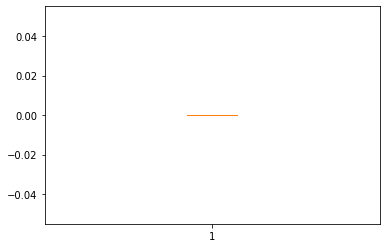

0.0
0.0


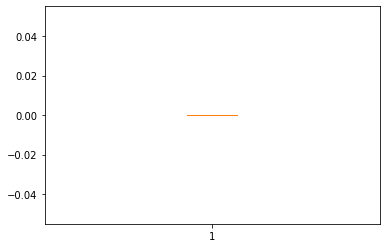

0.0
0.0


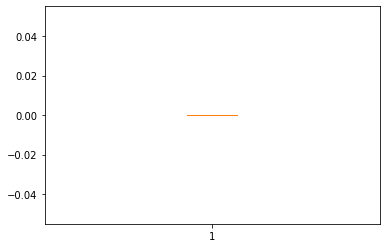

0.0
0.0


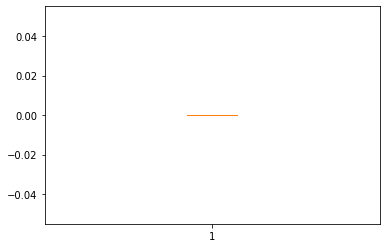

0.0
0.0


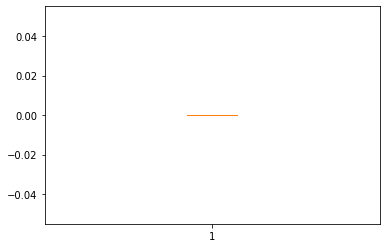

0.0
0.0


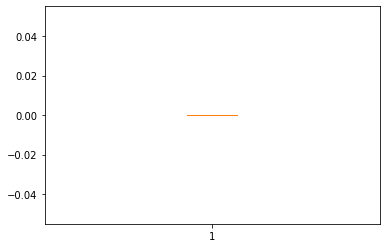

0.0
0.0


In [131]:
attributes = ['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [132]:
#All the value in case of std to other operator fixed line are 0.They can be dropped safely
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis = 1)

In [133]:
# The total attributes which can be dropped are
attributes = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(attributes,axis =1)

In [134]:
churn_dataset_filtered_train.shape

(20967, 128)

In [135]:
#Special incomming calls can be dropped the way special outgoing calls were
attributes = ['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(attributes,axis =1)

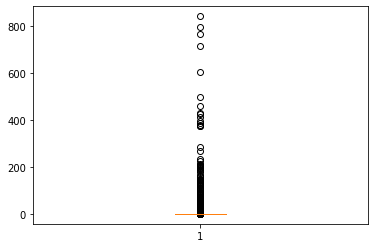

0.0
12.669452554744522


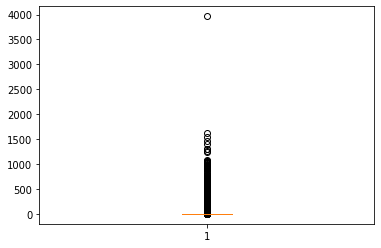

0.0
10.984561199704197


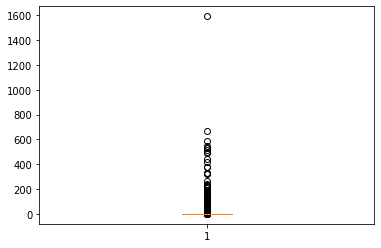

0.0
11.978569643972522


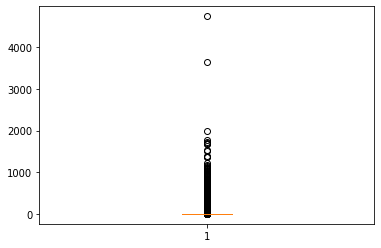

0.0
12.675645602948823


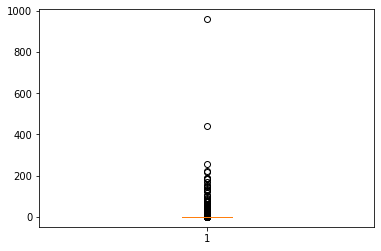

0.0
6.156920444824636


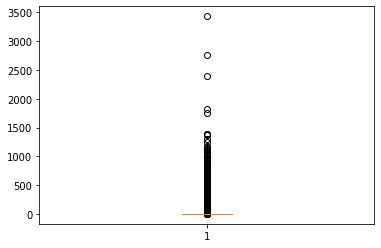

0.0
12.13422457917782


In [136]:
attributes = ['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [137]:
#There are differences in both mean  of the groups.So possible incoming isd calls should be an attribute
#for seperation between classes.However the data is highly skewed so so median vallues can be used for impution
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

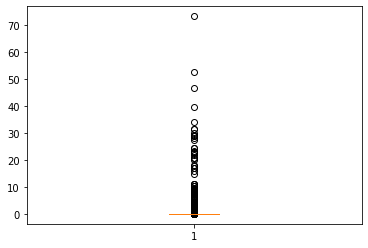

0.0
0.8747931873479319


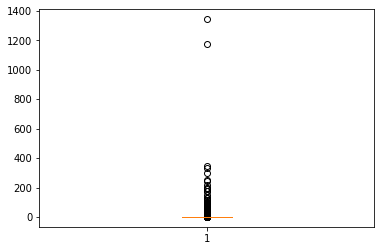

0.0
1.1595400781497525


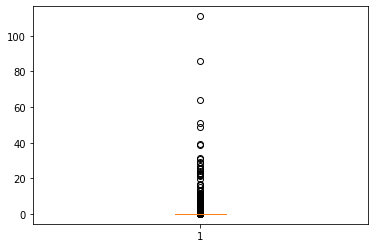

0.0
0.909925046845721


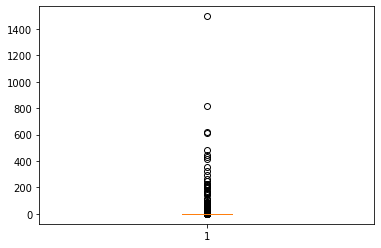

0.0
1.5679789362822585


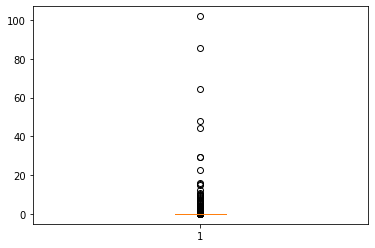

0.0
0.6124037639007702


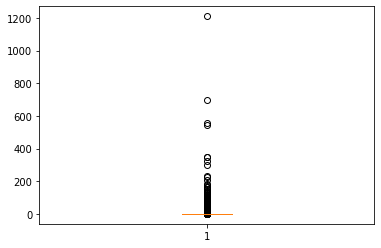

0.0
1.3333085325312695


In [138]:
#Finally with regard to call minutes lets look at other incoming calls
attributes = ['ic_others_6','ic_others_7','ic_others_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [139]:
#There are some differences in distributions atleast with regard to extreme values
#Its good to retain them ,they seem to be highly skewed ,so they can be imputed by median
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

We can drop the total recharge num as it has erronous data ,for instance some rows indicate that even though
the recharge amount is positive for a month the value for number times of recharge is 0 and vice versa the number of times recharged is positive even though the recharge amount is 0.We can impute the value corresponding to 0 recharge amount with 0 times recharged.

In [140]:
churn_dataset_filtered_train.loc[churn_dataset_filtered_train['total_rech_amt_6'] ==0,'total_rech_num_6'] = 0
churn_dataset_filtered_train.loc[churn_dataset_filtered_train['total_rech_amt_7'] ==0,'total_rech_num_7'] = 0
churn_dataset_filtered_train.loc[churn_dataset_filtered_train['total_rech_amt_8'] ==0,'total_rech_num_8'] = 0

Total recharge does not have any na or invalid values ,neither does total number of recharge

We can drop the columns corressponding to max_recharge_6,max_recharge_7,max_recharge_8

In [141]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'],axis = 1)

In [142]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis = 1)

In [143]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis = 1)

Now lets look at the columns with high missing percentage

In [144]:
percent_missing = churn_dataset_filtered_train.isnull().sum() * 100 / len(churn_dataset_filtered_train)
missing_value_df = pd.DataFrame({'column_name': churn_dataset_filtered_train.columns,'percent_missing': percent_missing})

In [145]:
missing_value_df.loc[(missing_value_df['percent_missing'] >40),['column_name','percent_missing']]

column_name  percent_missing
total_rech_data_6  total_rech_data_6        43.878476
total_rech_data_7  total_rech_data_7        42.977059
total_rech_data_8  total_rech_data_8        46.725807
max_rech_data_6      max_rech_data_6        43.878476
max_rech_data_7      max_rech_data_7        42.977059
max_rech_data_8      max_rech_data_8        46.725807
night_pck_user_6    night_pck_user_6        43.878476
night_pck_user_7    night_pck_user_7        42.977059
night_pck_user_8    night_pck_user_8        46.725807
fb_user_6                  fb_user_6        43.878476
fb_user_7                  fb_user_7        42.977059
fb_user_8                  fb_user_8        46.725807

We can drop all the variables like total_rech_data_6,7,8 as we have new columns for it which determines it.Also max_rech_data
6,7,8 serves no purpose as total recharge is much more significant.

In [146]:
attributes = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8']
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(attributes,axis = 1)

In [147]:
churn_dataset_filtered_train.shape

(20967, 110)

In [148]:
percent_missing = churn_dataset_filtered_train.isnull().sum() * 100 / len(churn_dataset_filtered_train)
missing_value_df = pd.DataFrame({'column_name': churn_dataset_filtered_train.columns,'percent_missing': percent_missing})
missing_value_df.loc[(missing_value_df['percent_missing'] >40),['column_name','percent_missing']]

column_name  percent_missing
night_pck_user_6  night_pck_user_6        43.878476
night_pck_user_7  night_pck_user_7        42.977059
night_pck_user_8  night_pck_user_8        46.725807
fb_user_6                fb_user_6        43.878476
fb_user_7                fb_user_7        42.977059
fb_user_8                fb_user_8        46.725807

In [149]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],axis = 1)

In [150]:
#We can drop date_of_last_rech_8 and std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8 as they are already being handle by 
#individual months
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['date_of_last_rech_8','std_og_mou_6','std_og_mou_7','std_og_mou_8'],axis = 1)

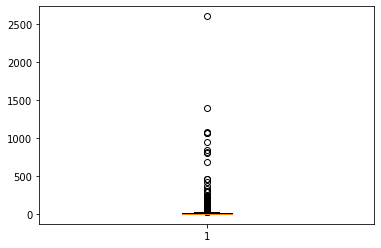

1.46
21.156672749391735


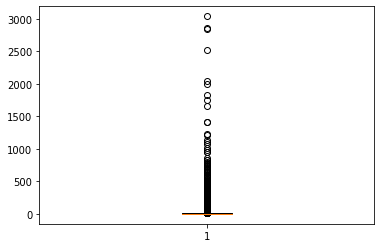

0.43
14.650636286830592


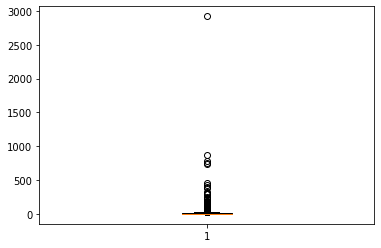

0.7
16.6952717051843


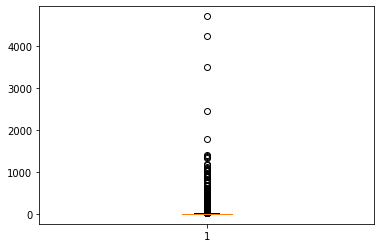

0.51
15.48010689836741


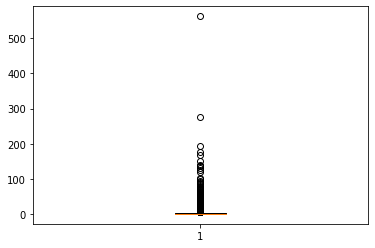

0.0
6.577647562018822


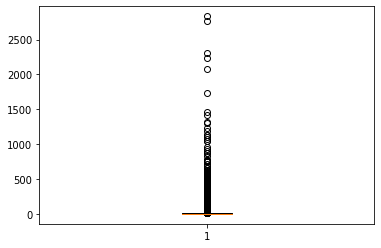

0.38
14.853965489947619


In [151]:
# We can analyze incomming std calls
attributes = ['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)
#churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

In [152]:
#We can retain these attributes and impute by their median of respective classes
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

We can as well drop off the variables onnet,offnet as they are the total of incomming and outgoing calls as they are 
already taken care by rest of the variables

In [153]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis =1 )

Now lets analyze the final two types of variables roaming incoming calls and roaming outgoing calls.

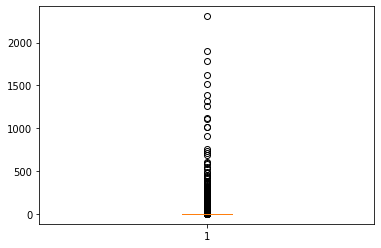

0.0
31.86925790754259


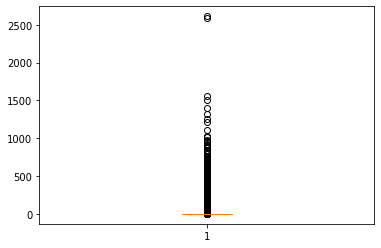

0.0
15.30852518745378


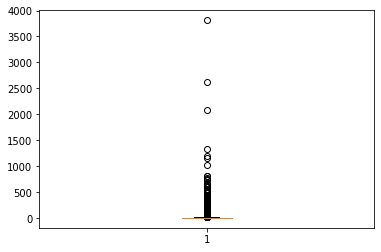

0.0
34.50038101186764


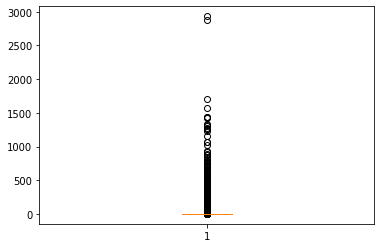

0.0
11.22409741969453


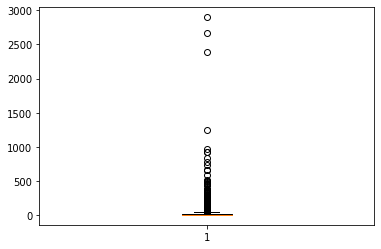

1.38
41.180547476475596


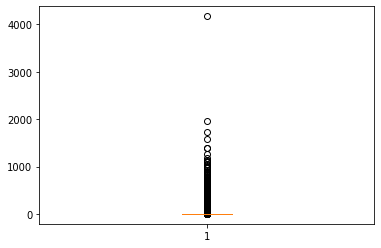

0.0
11.253692153448323


In [154]:
attributes = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

We see that the churners have higher mean and the differences in distribution for both churners and non churners

In [155]:
attributes = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

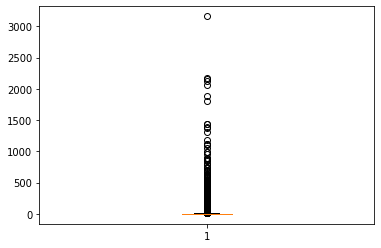

0.0
55.61266423357666


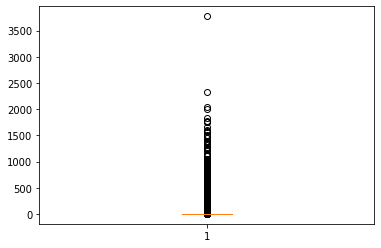

0.0
24.767203506178106


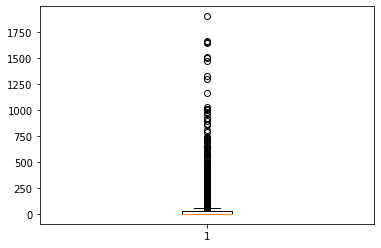

0.0
55.54542785758895


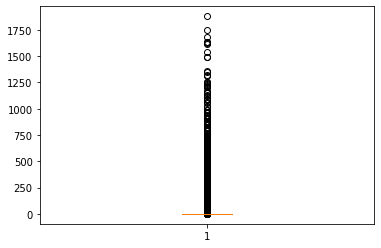

0.0
17.458630858346513


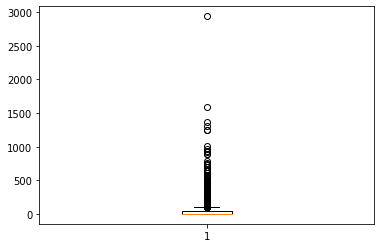

2.48
62.06208725406333


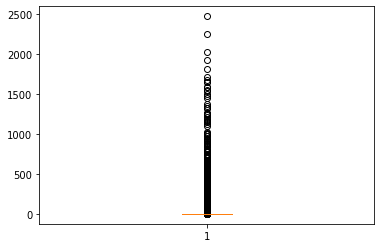

0.0
17.940404727982653


In [156]:
attributes = ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)

In [157]:
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

In [158]:
print(sum(churn_dataset_filtered_train.isna().sum()))
churn_dataset_filtered_train.shape

0


(20967, 94)

So finally the data is clean we not have any missing values and useful columns are retained

Now we can do some outlier treatment

In [161]:
new_columns = churn_dataset_filtered_train.columns
strictly_float = []
for i in new_columns:
     c = list(filter(lambda x:isStrictlyFloat(str(x)),churn_dataset_filtered_train[i]))
     if len(c)>0:
        strictly_float.append(i)

In [162]:
len(strictly_float)

73

In [166]:
t = list(filter(lambda x:(x not in strictly_float),new_columns))

In [182]:
df_ints = churn_dataset_filtered_train[t]
print(df_ints.describe())
low_max = []
for i in t:
     if max(df_ints[i]) > 2*np.std(df_ints[i])+np.mean(df_ints[i]):
       low_max.append(i) 
print(low_max)

       circle_id  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count    20967.0      20967.000000      20967.000000      20967.000000   
mean       109.0         11.782515         11.608575          9.820861   
std          0.0          9.457346          9.391621          9.386451   
min        109.0          0.000000          0.000000          0.000000   
25%        109.0          6.000000          6.000000          4.000000   
50%        109.0          9.000000          9.000000          7.000000   
75%        109.0         15.000000         14.000000         13.000000   
max        109.0        307.000000        138.000000        196.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  monthly_2g_6  \
count      20967.000000      20967.000000      20967.000000  20967.000000   
mean         661.689321        658.112510        584.749416      0.177135   
std          576.401653        595.620618        636.929701      0.438974   
min            0.000000  

In [201]:
#uniquevals_newcols = list(filter(lambda x:len(churn_dataset_filtered_train[x].unique)>0,new_columns))
#print(len(uniquevals_newcols))

In [202]:
#print(low_max)

For outlier treatment first lets get the mean and standard deviation of each of the numeric columns dropping churn and 
circle_id.As the circle_id is categorical varaible so it cannot have outliers.

In [240]:
churn = churn_dataset_filtered_train['churn']
circle_id = churn_dataset_filtered_train['circle_id']
back_churndataset = churn_dataset_filtered_train
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['circle_id','churn'],axis = 1)

In [241]:
uniquevals_newcols = list(filter(lambda x:len(churn_dataset_filtered_train[x].unique())>0,churn_dataset_filtered_train.columns))
t = []
for j in uniquevals_newcols:
    t.append(len(churn_dataset_filtered_train[j].unique()))
    if len(churn_dataset_filtered_train[j].unique()) ==5:
        print(j)
print(max(t))
print(min(t))

monthly_2g_6
12497
5


We can drop the outliers that are more than 2 standard deviations away from mean of each column


In [272]:
indexes_tobedropped = remove_Outliers(churn_dataset_filtered_train)


In [282]:
print(len(indexes_tobedropped))

655


In [227]:
churn_dataset_filtered_train = back_churndataset
back_churn_2 = churn_dataset_filtered_train

In [276]:
print(churn_dataset_filtered_train.shape)

(20967, 92)


In [303]:
cf2 = churn_dataset_filtered_train.drop(churn_dataset_filtered_train.index[indexes_tobedropped])

In [306]:
cf2.shape
cf3 = cf2
cf3.columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_

In [307]:
cf3[cf3.columns] = preprocessing.StandardScaler().fit_transform(cf3[cf3.columns])

In [308]:
cf3.head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
16686       3.207570       6.987704      -0.160753       3.217713   
84709      -0.202891      -0.133086      -0.064149      -0.222866   
33699      -0.202891      -0.160834      -0.160753      -0.222866   
25535      -0.202891      -0.160834      -0.160753      -0.222866   
49976      -0.202891      -0.160834      -0.160753      -0.222866   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
16686       7.937766      -0.200436         -0.337167         -0.286694   
84709      -0.195941      -0.128473         -0.110718         -0.351880   
33699      -0.206659      -0.200436         -0.379364         -0.359892   
25535      -0.206659      -0.200436          0.302637         -0.049281   
49976      -0.206659      -0.200436         -0.292688         -0.332968   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  ...  sachet_3g_7  sachet_3g_8  \
16686         -0.011390         -0.413483  ...     -0.23514    -0.203137   
84709         -0.365201         -0.381020  ...     -0.23514    -0.203137   
33699         -0.340358         -0.542534  ...     -0.23514    -0.203137   
25535         -0.119745          0.877201  ...     -0.23514    -0.203137   
49976         -0.247183         -0.452481  ...     -0.23514    -0.203137   

            aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
16686 -0.744716   -0.421421   -0.421666   -0.398497   -0.154014   
84709 -1.066380   -0.421421   -0.421666   -0.398497   -0.154014   
33699 -0.341857   -0.421421   -0.421666   -0.398497   -0.154014   
25535 -0.972691   -0.421421   -0.421666   -0.398497   -0.154014   
49976 -0.582323    3.366974    0.330895   -0.398497    5.237052   

       avg_recharge_amt  total_data_rech_month_6  total_data_rech_month_7  
16686         -0.213274                -0.476146                -0.481603  
84709         -0.697346                -0.476146                -0.481603  
33699          0.305846                 1.301871                 0.499850  
25535          0.104150                -0.476146                -0.481603  
49976         -0.396455                 0.351714                 0.244177  

[5 rows x 92 columns]

In [310]:
scaled_churndata = cf3

In [294]:
print(circle_id.shape[0])
circle_id_filtered = circle_id.drop(circle_id.index[indexes_tobedropped])

20967


In [295]:
circle_id_filtered.shape

(20312,)

In [318]:
#cf4 = pd.concat([scaled_churndata,circle_id_filtered],ignore_index = True)
scaled_churndata['circle_id'] = circle_id_filtered

In [320]:
#circle_id_filtered.head()
print(scaled_churndata['circle_id'].head())

16686    109
84709    109
33699    109
25535    109
49976    109
Name: circle_id, dtype: int64


In [324]:
cf5 = scaled_churndata
churn_filtered = churn.drop(churn.index[indexes_tobedropped])
cf5['churn'] = churn_filtered
cf5.to_csv('scaled_no_outlier.csv')

In [335]:
sf = scaled_churndata.drop(['circle_id'],axis = 1)